In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import StrMethodFormatter

In [4]:
def get_metric_file(ckpt_folder, metric):
    
    if metric == 'test_acc':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'loss_acc.pkl')
    elif metric == 'loss':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'loss_acc.pkl')
    elif metric == 'CKA':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'CKA_mixup_alpha_16.0.pkl')
    elif 'hessian' in metric:
        file_name = os.path.join(ckpt_folder, f'metrics/', f'hessian.pkl')
    elif metric == 'mode_connectivity':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'curve_test.npz')
    elif metric == 'L2':
        file_name = os.path.join(ckpt_folder, f'metrics/', 'model_dist.pkl')
    elif metric == 'neural_eff':
        file_name = os.path.join(ckpt_folder, f'metrics/', 'neural_eff.pkl')
    elif metric == 'gradient':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'gradient.pkl')
    elif metric == 'fisher':
        file_name = os.path.join(ckpt_folder, 'metrics/', 'fisher.pkl')
    assert os.path.exists(file_name), f'File {file_name} does not exist'
    return file_name

In [7]:
def get_metric_val(metric_file, metric):
    
    if metric == 'test_acc':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean([results[n]['accuracy'] for n in range(3)])
    if metric == 'loss':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean([results[n]['loss'] for n in range(3)])
    elif metric == 'neural_eff':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'gradient':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'fisher':
        results = pickle.load(open(metric_file, 'rb'))
        return np.mean(results)
    elif metric == 'CKA':
        results = pickle.load(open(metric_file, "rb"))
        CKA_all = []
        for exp_ind1 in range(3):
            for exp_ind2 in range(3):
                if exp_ind1 != exp_ind2:
                    CKA_all.append(results['representation_similarity'][exp_ind1][exp_ind2][-1])
        return np.mean(CKA_all)
    elif 'hessian' in metric:
        results = pickle.load(open(metric_file, "rb"))
        if '_e' in metric:
            return np.log(np.mean([results[n]['top_eigenvalue'][0] for n in range(3)]))
        elif '_t' in metric:
            return np.log(np.mean([results[n]['trace'] for n in range(3)]))
    elif metric == 'mode_connectivity':
        result = np.load(metric_file)['tr_err']
        u = np.argmax(np.abs(result - (result[0] + result[4])/2))
        return (result[0] + result[4])/2 - result[u]
    elif metric == 'L2':
        results = pickle.load(open(metric_file, "rb"))
        dist_all = []
        for exp_ind1 in range(3):
            for exp_ind2 in range(3):
                if exp_ind1 != exp_ind2:
                    dist_all.append(results['model_distance'][exp_ind1][exp_ind2]['dist'])
        return np.mean(dist_all)

In [62]:
def vminmax(metric):
    if metric == 'test_acc':
        vmin, vmax = 0, .4
    elif metric == 'loss':
        vmin, vmax = 5, 30
    elif metric == 'CKA':
        vmin, vmax = 0.85, .998
    elif metric == 'mode_connectivity':
        vmin, vmax = -30, 30
    elif metric == 'L2':
        vmin, vmax = 4, 8
    elif metric == 'hessian_e':
        vmin, vmax = 4, 13
    elif metric == 'hessian_t':
        vmin, vmax = 5, 13
    elif metric == 'neural_eff':
        vmin, vmax = 0.06, 0.11
    elif metric == 'gradient':
        vmin, vmax = -10, 25
    elif metric == 'fisher':
        vmin, vmax = 0.2, 0.6
    return vmin, vmax

In [63]:
def plot_2Dphase(phase2D, x_label_list, y_label_list, metric, metric_title):
    
    fig, ax = plt.subplots(1,1, figsize = (5,4))
    
    X,Y = np.meshgrid(x_label_list, y_label_list)
    vmin, vmax = vminmax(metric)
    
    if metric == 'mode_connectivity':
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="seismic")
    elif metric in ['L2', 'loss', 'hessian_e', 'hessian_t']:
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="viridis_r", edgecolors='k')
    else:
        pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="viridis",edgecolors='k')
    # pos = ax.pcolormesh(X,Y,phase2D, vmin=vmin, vmax=vmax, cmap="viridis",edgecolors='k')
    ax.set_xscale("linear")
                
    ax.set_yticks(y_label_list)
    ax.set_yscale("log")
    ax.invert_yaxis()
    
    ax.set_xlabel('Bit Width', fontsize=20)
    ax.set_ylabel(f'T (Learning Rate)', fontsize=20)
    ax.set_title(metric_title, fontsize=20)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.15)
    cbar = plt.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=18)
    plt.tight_layout()
    # plt.savefig(f'{metric}.png')


Metric : loss - max/min : 6264430979153.12/1048.9725067437585
Metric : L2 - max/min : 8537.784342447916/106.5160624186198
Metric : hessian_t - max/min : 12.291993268700672/5.851455361915041
Metric : hessian_e - max/min : 10.934167244945398/4.204218355258266
Metric : neural_eff - max/min : 0.10944997519254684/0.08140406012535095


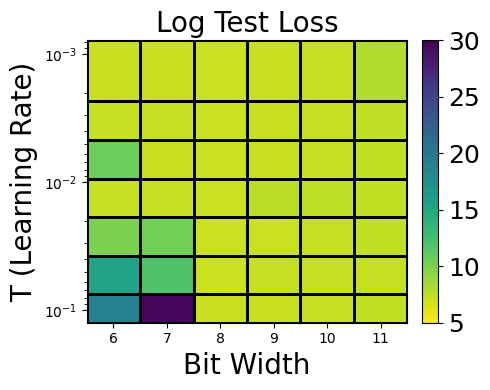

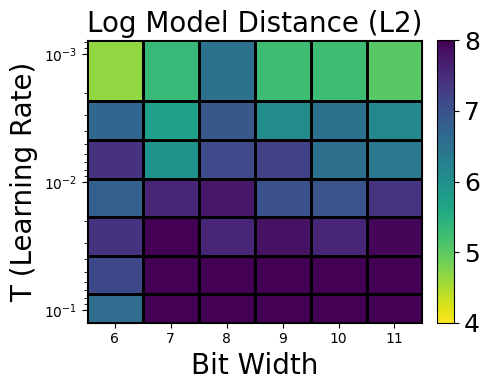

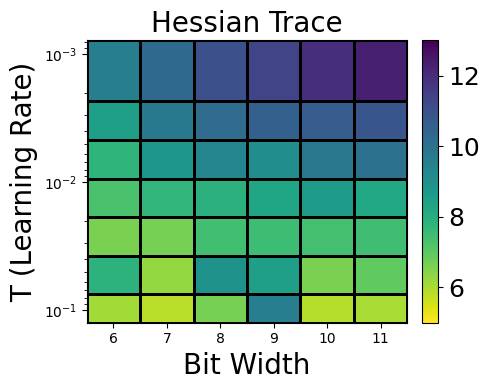

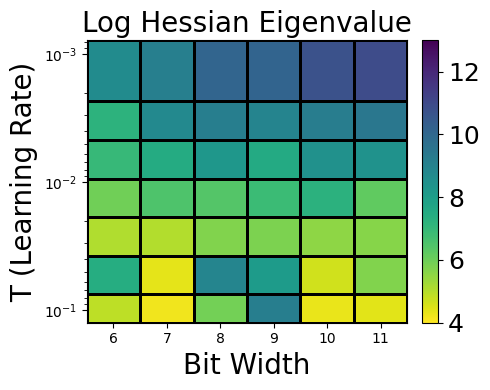

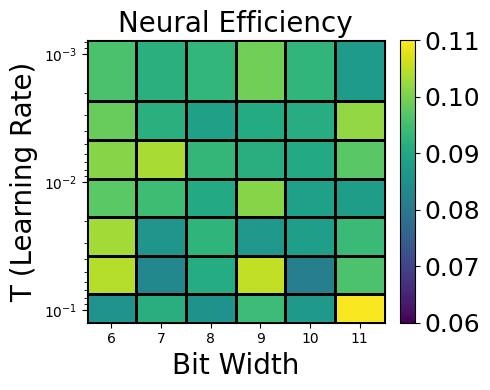

In [64]:
width_list = [6, 7, 8, 9, 10,11]
bs_list = [16, 32, 64, 128, 256, 512, 1024]
lr_list = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625]

metric_list = ['loss', 'L2', 'hessian_t', 'hessian_e', 'neural_eff']
metric_title_list = ['Log Test Loss', 'Log Model Distance (L2)', 'Hessian Trace', 'Log Hessian Eigenvalue', 'Neural Efficiency', 'Model Distance (L2)']

t_list = lr_list

for metric, metric_title in zip(metric_list, metric_title_list):

    lenx = len(width_list)
    leny = len(t_list)
    phase2D = np.zeros((leny, lenx))

    for j,width in enumerate(width_list):
        for i,lr in enumerate(t_list):
            ckpt_folder = f'../checkpoint/different_knobs_subset_10/lr_{lr}/normal/ECON_{width}b/'
            ckpt_folder = f'../checkpoint/different_knobs_subset_10/lr_{lr}/normal/AD_{width}b/'
            metric_file = get_metric_file(ckpt_folder, metric)
            phase2D[i][j] = get_metric_val(metric_file, metric)
    print(f'Metric : {metric} - max/min : {phase2D.max()}/{phase2D.min()}')
    phase2D = np.nan_to_num(phase2D, nan=0, posinf=0, neginf=0)
    
    if metric in ['loss', 'L2']:
        phase2D = np.log(phase2D)
    plot_2Dphase(phase2D, width_list, t_list, metric, metric_title)


In [61]:
print('Max', phase2D.max())
print('Min', phase2D.min())

Max 0.10944997519254684
Min 0.08140406012535095


In [56]:
phase2D

array([[ 739.95247396, 4668.1402181 , 5350.62304688, 4412.3190918 ,
        4837.05908203, 3181.48079427],
       [1232.02539062, 4252.16642253, 3920.61067708, 8537.78434245,
        4050.32128906, 4220.35579427],
       [1671.96492513, 5174.7430013 , 1945.84759521, 2482.32938639,
        1946.65568034, 2835.82088216],
       [ 894.61033122, 1957.14585368, 2333.12341309, 1097.02884928,
        1052.65252686, 1628.75585938],
       [1681.67232259,  392.17781576, 1213.06078593, 1400.81518555,
         677.53707886,  600.45220947],
       [ 813.47484334,  311.67356618, 1006.26308187,  431.50577799,
         669.92419434,  454.81772868],
       [ 106.51606242,  201.62647502,  673.7434082 ,  192.02539571,
         191.9312439 ,  155.50703939]])